Taux moyen observé du flot fusionné : 12.9605 (Attendu: 13)


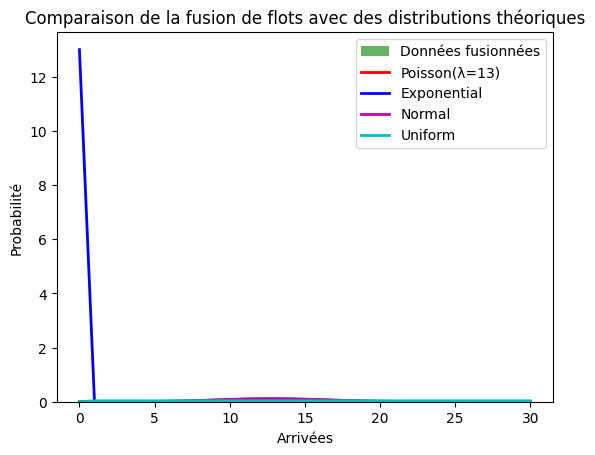

Poisson: p-value = 6.696398328417507e-97
Exponential: p-value = 0.0
Normal: p-value = 8.96446916559573e-47
Uniform: p-value = 0.0
La distribution qui correspond le mieux est: Normal


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson, expon, norm, uniform, kstest

# Fixer la graine pour assurer la reproductibilité
np.random.seed(1234)

# Paramètres de la simulation
lambda_1 = 8  # Taux du premier flot
lambda_2 = 5  # Taux du second flot
n_samples = 10000  # Nombre d'échantillons

# 1. Générer deux échantillons de distribution Poisson
# Chaque échantillon représente des temps entre les arrivées des paquets
arrival_1 = np.random.poisson(lam=lambda_1, size=n_samples)
arrival_2 = np.random.poisson(lam=lambda_2, size=n_samples)

# 2. Fusionner les deux flots
# On ajoute les arrivées des deux flots pour créer le flot résultant
merged_arrivals = arrival_1 + arrival_2

# 3. Vérifier que le taux de paquets du flot fusionné est λ1 + λ2
lambda_total = lambda_1 + lambda_2

# Calculer le taux moyen observé (on fait une moyenne arithmetique avec la fonction n.mean())
mean_rate_observed = np.mean(merged_arrivals)
print(f"Taux moyen observé du flot fusionné : {mean_rate_observed} (Attendu: {lambda_total})")

# 4. Affichage de l'histogramme des arrivées fusionnées
plt.hist(merged_arrivals, bins=30, density=True, alpha=0.6, color='g', label='Données fusionnées')

# Générer une distribution Poisson théorique avec λ = λ1 + λ2
"""
- np.arange() est une fonction de NumPy qui génère un tableau de 
nombres entiers compris entre les bornes spécifiées (ici entre 0 et max(merged_arrivals)+1).
- poisson.pmf() est une fonction de la bibliothèque scipy.stats qui calcule la fonction de masse 
de probabilité (PMF) pour une distribution de Poisson.
- La PMF d'une distribution de Poisson donne la probabilité qu'un certain nombre d'événements se 
produisent dans un intervalle de temps donné, pour un taux moyen d'événements (λ).

"""
x = np.arange(0, max(merged_arrivals)+1)
poisson_theory = poisson.pmf(x, lambda_total)

# 5. Comparaison avec quatre distributions bien connues
# On peut comparer avec la distribution Poisson, exponentielle, normale et uniforme
plt.plot(x, poisson_theory, 'r-', label=f'Poisson(λ={lambda_total})', linewidth=2)

# Distribution exponentielle
expon_theory = expon.pdf(x, scale=1/lambda_total)
plt.plot(x, expon_theory, 'b-', label=f'Exponential', linewidth=2)

# Distribution normale
norm_theory = norm.pdf(x, loc=np.mean(merged_arrivals), scale=np.std(merged_arrivals))
plt.plot(x, norm_theory, 'm-', label=f'Normal', linewidth=2)

# Distribution uniforme
uniform_theory = uniform.pdf(x, loc=np.min(merged_arrivals), scale=np.max(merged_arrivals)-np.min(merged_arrivals))
plt.plot(x, uniform_theory, 'c-', label=f'Uniform', linewidth=2)

# Ajouter la légende et afficher le graphique
plt.legend()
plt.title("Comparaison de la fusion de flots avec des distributions théoriques")
plt.xlabel("Arrivées")
plt.ylabel("Probabilité")
plt.show()

# 6. Tester la meilleure distribution par p-value (K-S test)
# Comparer les données fusionnées avec chacune des distributions théoriques

# Test avec la distribution Poisson
stat_poisson, p_poisson = kstest(merged_arrivals, 'poisson', args=(lambda_total,))
print(f"Poisson: p-value = {p_poisson}")

# Test avec la distribution exponentielle
stat_expon, p_expon = kstest(merged_arrivals, 'expon', args=(np.min(merged_arrivals), 1/lambda_total))
print(f"Exponential: p-value = {p_expon}")

# Test avec la distribution normale
stat_norm, p_norm = kstest(merged_arrivals, 'norm', args=(np.mean(merged_arrivals), np.std(merged_arrivals)))
print(f"Normal: p-value = {p_norm}")

# Test avec la distribution uniforme
stat_uniform, p_uniform = kstest(merged_arrivals, 'uniform', args=(np.min(merged_arrivals), np.max(merged_arrivals)-np.min(merged_arrivals)))
print(f"Uniform: p-value = {p_uniform}")

# Conclusion : La meilleure distribution est celle qui a la plus grande p-value
p_values = {
    "Poisson": p_poisson,
    "Exponential": p_expon,
    "Normal": p_norm,
    "Uniform": p_uniform
}

best_fit = max(p_values, key=p_values.get)
print(f"La distribution qui correspond le mieux est: {best_fit}")

# 7. Tester la robustesse en changeant lambda_1, lambda_2 et n_samples
# Par exemple, pour d'autres valeurs de lambda et un plus grand nombre d'échantillons,
# on peut réexécuter les étapes précédentes en modifiant ces paramètres


Taux moyen observé du flot fusionné (non Poisson): 0.2623884770970797


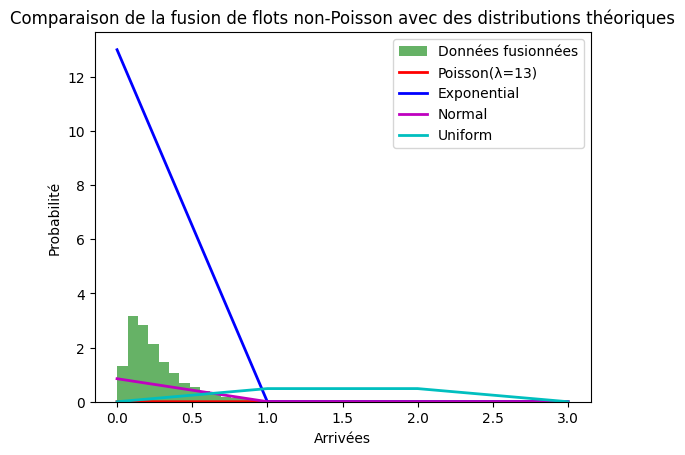

Poisson: p-value = 0.0
Exponential: p-value = 0.0
Normal: p-value = 6.210526811619591e-140
Uniform: p-value = 0.0
La distribution qui correspond le mieux est: Normal


In [4]:
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.stats import poisson, expon, uniform, norm, kstest

# Fixer la graine pour assurer la reproductibilité
np.random.seed(1234)

# Paramètres de la simulation
lambda_1 = 5  # Paramètre similaire à lambda_1 pour comparaison
lambda_2 = 8  # Paramètre similaire à lambda_2 pour comparaison
n_samples = 10000  # Nombre d'échantillons

# 1. Générer deux flots qui NE SUIVENT PAS une distribution Poisson
# Flot 1 : Distribution exponentielle (temps entre arrivées suit une loi exponentielle)
arrival_1 = np.random.exponential(scale=1/lambda_1, size=n_samples)

# Flot 2 : Distribution uniforme (temps entre arrivées réparti uniformément)
arrival_2 = np.random.uniform(low=0, high=1/lambda_2, size=n_samples)

# 2. Fusionner les deux flots
# Ici on additionne les temps entre les arrivées pour obtenir le flot résultant
merged_arrivals = arrival_1 + arrival_2

# 3. Calculer le taux moyen observé pour le flot fusionné
mean_rate_observed = np.mean(merged_arrivals)
print(f"Taux moyen observé du flot fusionné (non Poisson): {mean_rate_observed}")

# 4. Afficher l'histogramme des arrivées fusionnées
plt.hist(merged_arrivals, bins=30, density=True, alpha=0.6, color='g', label='Données fusionnées')

# Générer une distribution Poisson théorique avec λ = λ1 + λ2
lambda_total = lambda_1 + lambda_2
x = np.arange(0, max(merged_arrivals)+1)
poisson_theory = poisson.pmf(x, lambda_total)

# 5. Comparaison avec plusieurs distributions théoriques
plt.plot(x, poisson_theory, 'r-', label=f'Poisson(λ={lambda_total})', linewidth=2)

# Distribution exponentielle
expon_theory = expon.pdf(x, scale=1/lambda_total)
plt.plot(x, expon_theory, 'b-', label=f'Exponential', linewidth=2)

# Distribution normale
norm_theory = norm.pdf(x, loc=np.mean(merged_arrivals), scale=np.std(merged_arrivals))
plt.plot(x, norm_theory, 'm-', label=f'Normal', linewidth=2)

# Distribution uniforme
uniform_theory = uniform.pdf(x, loc=np.min(merged_arrivals), scale=np.max(merged_arrivals)-np.min(merged_arrivals))
plt.plot(x, uniform_theory, 'c-', label=f'Uniform', linewidth=2)

# Ajouter la légende et afficher le graphique
plt.legend()
plt.title("Comparaison de la fusion de flots non-Poisson avec des distributions théoriques")
plt.xlabel("Arrivées")
plt.ylabel("Probabilité")
plt.show()

# 6. Tester la meilleure distribution par p-value (K-S test)
# Comparer les données fusionnées avec chacune des distributions théoriques

# Test avec la distribution Poisson
""" 
- Le test de Kolmogorov-Smirnov (KS) compare la distribution empirique 
(c’est-à-dire les données observées) avec une distribution théorique 
(ici, une distribution Poisson) pour déterminer si les données observées 
- ce test permet de vérifier si le flot fusionné peut être considéré comme un 
processus Poisson en comparant les données observées avec une distribution Poisson 
théorique.
- args=(lambda_total,) : Ce paramètre spécifie la valeur du paramètre 𝜆
de la distribution Poisson théorique à utiliser dans le test. Ici, lambda_total correspond
à la somme 𝜆1+𝜆2, qui est le taux moyen d'arrivées du flot fusionné selon l'hypothèse 
Poisson.
- stat_poisson : C'est la statistique KS (ou statistique de Kolmogorov-Smirnov). 
Elle mesure la distance maximale entre la fonction de répartition empirique des données 
observées et la fonction de répartition de la distribution théorique (ici Poisson). 
Une valeur plus petite indique un meilleur ajustement.
- p_poisson : C'est la p-value du test. Elle indique la probabilité de rejeter l'hypothèse
 nulle (qui stipule que les données suivent bien la distribution Poisson), si celle-ci est 
 vraie.
- Si p_poisson <0.05 alors on cela ne suit pas poisson. Si p_poison >0.05 on ne 
peut pas rejeter l'hythèse.

"""
stat_poisson, p_poisson = kstest(merged_arrivals, 'poisson', args=(lambda_total,))
print(f"Poisson: p-value = {p_poisson}")

# Test avec la distribution exponentielle
""" 
- args=(np.min(merged_arrivals), 1/lambda_total) : Ce paramètre précise les arguments pour définir la 
distribution exponentielle contre laquelle vous effectuez le test :
- np.min(merged_arrivals) : Il s'agit de la localisation de la distribution exponentielle, aussi appelée
 paramètre de décalage. Cela détermine à partir de quel point la distribution exponentielle commence. Ici, 
 on ajuste la distribution exponentielle en fixant ce paramètre au minimum des valeurs observées dans 
 merged_arrivals, pour correspondre aux données.
- 1/lambda_total : Ce paramètre représente le paramètre d'échelle de la distribution exponentielle. 
Dans une distribution exponentielle, l'échelle est l'inverse du taux moyen d'arrivées. 
Ici, on prend comme échelle 1/𝜆total 


"""
stat_expon, p_expon = kstest(merged_arrivals, 'expon', args=(np.min(merged_arrivals), 1/lambda_total))
print(f"Exponential: p-value = {p_expon}")

# Test avec la distribution normale
""" 
- args=(np.mean(merged_arrivals), np.std(merged_arrivals)) : Ce paramètre précise les arguments de la 
distribution normale théorique utilisée dans le test :
- np.mean(merged_arrivals) : C'est la moyenne des données merged_arrivals, qui est utilisée comme la moyenne 𝜇
  de la distribution normale théorique.
- np.std(merged_arrivals) : C'est l'écart-type des données merged_arrivals, qui est utilisé comme l'écart-type 
σ de la distribution normale théorique.
"""
stat_norm, p_norm = kstest(merged_arrivals, 'norm', args=(np.mean(merged_arrivals), np.std(merged_arrivals)))
print(f"Normal: p-value = {p_norm}")

# Test avec la distribution uniforme
""" 
- args=(np.min(merged_arrivals), np.max(merged_arrivals)-np.min(merged_arrivals)) : Ce paramètre spécifie 
les arguments de la distribution uniforme théorique :
- np.min(merged_arrivals) : C'est la borne inférieure de la distribution uniforme, soit la plus petite valeur 
dans merged_arrivals.
- np.max(merged_arrivals) - np.min(merged_arrivals) : C'est l'intervalle ou l'amplitude de la distribution 
uniforme. Il représente la différence entre la plus grande valeur et la plus petite valeur dans merged_arrivals.
- 
"""
stat_uniform, p_uniform = kstest(merged_arrivals, 'uniform', args=(np.min(merged_arrivals), np.max(merged_arrivals)-np.min(merged_arrivals)))
print(f"Uniform: p-value = {p_uniform}")

# Conclusion : La meilleure distribution est celle qui a la plus grande p-value
p_values = {
    "Poisson": p_poisson,
    "Exponential": p_expon,
    "Normal": p_norm,
    "Uniform": p_uniform
}

best_fit = max(p_values, key=p_values.get)
print(f"La distribution qui correspond le mieux est: {best_fit}")


Vérification: λ1 + λ2 = 10.0, attendu: λ0 = 10


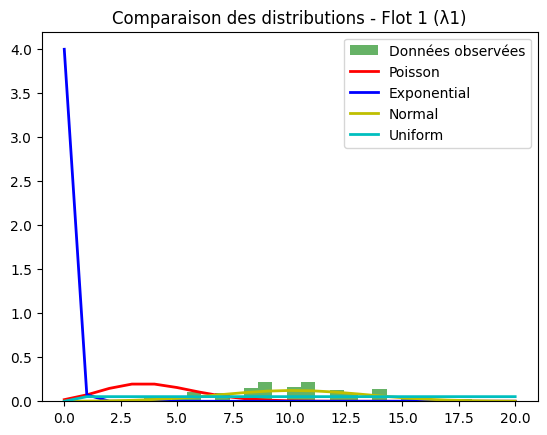

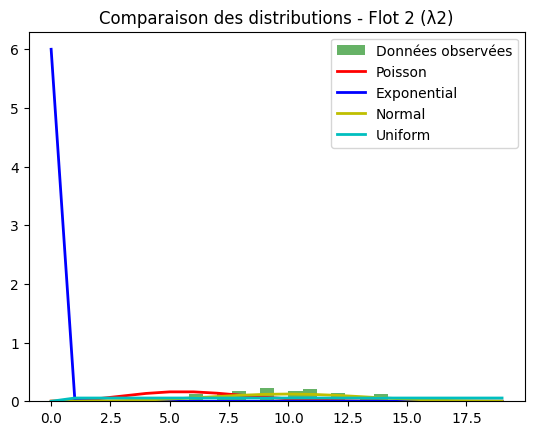

Test des distributions pour le Flot 1 (λ1):
Flot 1 - Poisson: p-value = 1.88897964409146e-282
Flot 1 - Exponential: p-value = 0.0
Flot 1 - Normal: p-value = 0.014266926314318406
Flot 1 - Uniform: p-value = 1.0019214644553749e-18

Test des distributions pour le Flot 2 (λ2):
Flot 2 - Poisson: p-value = 9.901375196595024e-227
Flot 2 - Exponential: p-value = 0.0
Flot 2 - Normal: p-value = 0.000301930890421587
Flot 2 - Uniform: p-value = 1.3964669187406305e-21
λ0 = 5, n_samples = 500: λ1 + λ2 = 5.0
λ0 = 5, n_samples = 1000: λ1 + λ2 = 5.0
λ0 = 5, n_samples = 2000: λ1 + λ2 = 5.0
λ0 = 10, n_samples = 500: λ1 + λ2 = 10.0
λ0 = 10, n_samples = 1000: λ1 + λ2 = 10.0
λ0 = 10, n_samples = 2000: λ1 + λ2 = 10.0
λ0 = 20, n_samples = 500: λ1 + λ2 = 20.0
λ0 = 20, n_samples = 1000: λ1 + λ2 = 20.0
λ0 = 20, n_samples = 2000: λ1 + λ2 = 20.0


In [5]:
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.stats import poisson, expon, norm, uniform, kstest

# Fixer la graine pour la reproductibilité
np.random.seed(1234)

# Paramètres initiaux
lambda_0 = 10  # Taux du flot Poisson initial
n_samples = 1000  # Nombre d'échantillons
bifurcation_ratio = 0.4  # Probabilité de bifurcation dans le premier flot

# Générer les échantillons du flot Poisson avec λ0
flot_poisson = np.random.poisson(lambda_0, size=n_samples)

# Bifurcation aléatoire
""" 
- np.random.rand(n_samples): Cette fonction génère un tableau de nombres aléatoires uniformément distribués 
entre 0 et 1. La taille du tableau est n_samples, donc on obtient un tableau de n_samples nombres aléatoires.
- np.random.rand(n_samples) < bifurcation_ratio: Ici, on compare chaque nombre aléatoire généré par 
np.random.rand(n_samples) à la valeur de bifurcation_ratio (qui est un nombre entre 0 et 1, par exemple 0.4).
Le résultat est un tableau de valeurs booléennes (True/False), où chaque entrée est True si le nombre 
aléatoire correspondant est inférieur à bifurcation_ratio et False sinon.
Si bifurcation_ratio est 0.4, environ 40% des éléments devraient être True.
- flot_poisson[np.random.rand(n_samples) < bifurcation_ratio] : On utilise ce tableau booléen comme un masque
 pour sélectionner les éléments du tableau flot_poisson.Concrètement, cela signifie que seuls les événements 
 dans flot_poisson dont la position correspond à une valeur True dans le masque aléatoire seront sélectionnés et placés dans flot_1.
"""
flot_1 = flot_poisson[np.random.rand(n_samples) < bifurcation_ratio]
flot_2 = flot_poisson[np.random.rand(n_samples) >= bifurcation_ratio]

# Calcul des taux λ1 et λ2
lambda_1 = bifurcation_ratio * lambda_0
lambda_2 = (1 - bifurcation_ratio) * lambda_0

print(f"Vérification: λ1 + λ2 = {lambda_1 + lambda_2}, attendu: λ0 = {lambda_0}")

# Histogrammes et ajustements aux distributions connues pour chaque flot
def plot_histogram_and_distributions(flot, lambda_value, flot_name):
    # Histogramme des données
    plt.hist(flot, bins=30, density=True, alpha=0.6, color='g', label='Données observées')

    # Distributions théoriques
    x = np.arange(0, max(flot) + 1)
    poisson_theory = poisson.pmf(x, lambda_value)
    expon_theory = expon.pdf(x, scale=1/lambda_value)
    norm_theory = norm.pdf(x, np.mean(flot), np.std(flot))
    uniform_theory = uniform.pdf(x, np.min(flot), np.max(flot) - np.min(flot))

    # Tracer les distributions théoriques
    plt.plot(x, poisson_theory, 'r-', label='Poisson', linewidth=2)
    plt.plot(x, expon_theory, 'b-', label='Exponential', linewidth=2)
    plt.plot(x, norm_theory, 'y-', label='Normal', linewidth=2)
    plt.plot(x, uniform_theory, 'c-', label='Uniform', linewidth=2)

    plt.title(f'Comparaison des distributions - {flot_name}')
    plt.legend()
    plt.show()

# Plot pour flot 1
plot_histogram_and_distributions(flot_1, lambda_1, "Flot 1 (λ1)")

# Plot pour flot 2
plot_histogram_and_distributions(flot_2, lambda_2, "Flot 2 (λ2)")

# Tests KS pour vérifier l'ajustement des distributions
def test_distributions(flot, lambda_value, flot_name):
    # Test avec la distribution Poisson
    stat_poisson, p_poisson = kstest(flot, 'poisson', args=(lambda_value,))
    print(f"{flot_name} - Poisson: p-value = {p_poisson}")

    # Test avec la distribution exponentielle
    stat_expon, p_expon = kstest(flot, 'expon', args=(np.min(flot), 1/lambda_value))
    print(f"{flot_name} - Exponential: p-value = {p_expon}")

    # Test avec la distribution normale
    stat_norm, p_norm = kstest(flot, 'norm', args=(np.mean(flot), np.std(flot)))
    print(f"{flot_name} - Normal: p-value = {p_norm}")

    # Test avec la distribution uniforme
    stat_uniform, p_uniform = kstest(flot, 'uniform', args=(np.min(flot), np.max(flot)-np.min(flot)))
    print(f"{flot_name} - Uniform: p-value = {p_uniform}")

# Tester les distributions pour chaque flot
print("Test des distributions pour le Flot 1 (λ1):")
test_distributions(flot_1, lambda_1, "Flot 1")

print("\nTest des distributions pour le Flot 2 (λ2):")
test_distributions(flot_2, lambda_2, "Flot 2")

# Robustesse aux variations de λ0 et du nombre d'échantillons
def test_robustness(lambda_0_values, n_sample_values, bifurcation_ratio):
    for lambda_0 in lambda_0_values:
        for n_samples in n_sample_values:
            flot_poisson = np.random.poisson(lambda_0, size=n_samples)
            flot_1 = flot_poisson[np.random.rand(n_samples) < bifurcation_ratio]
            flot_2 = flot_poisson[np.random.rand(n_samples) >= bifurcation_ratio]
            lambda_1 = bifurcation_ratio * lambda_0
            lambda_2 = (1 - bifurcation_ratio) * lambda_0
            print(f"λ0 = {lambda_0}, n_samples = {n_samples}: λ1 + λ2 = {lambda_1 + lambda_2}")

# Variations de λ0 et du nombre d'échantillons
lambda_0_values = [5, 10, 20]
n_sample_values = [500, 1000, 2000]
test_robustness(lambda_0_values, n_sample_values, bifurcation_ratio)


Vérification: λ1 + λ2 = 10.0, attendu: λ0 = 10


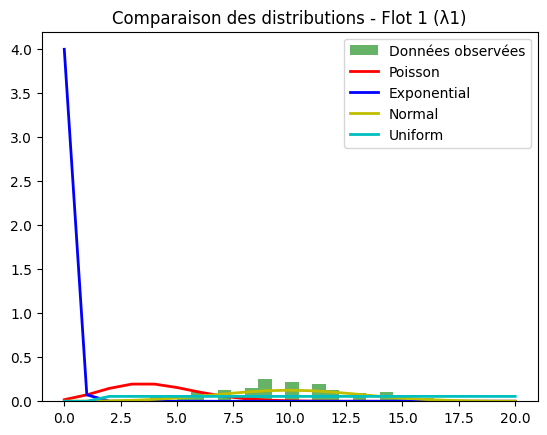

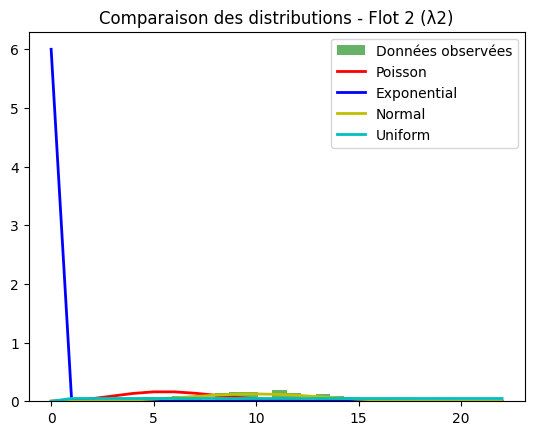

Test des distributions pour le Flot 1 (λ1):
Flot 1 - Poisson: p-value = 1.7391569985364212e-292
Flot 1 - Exponential: p-value = 0.0
Flot 1 - Normal: p-value = 0.0031480062870168184
Flot 1 - Uniform: p-value = 8.957664817111978e-22

Test des distributions pour le Flot 2 (λ2):
Flot 2 - Poisson: p-value = 5.514783061338344e-222
Flot 2 - Exponential: p-value = 0.0
Flot 2 - Normal: p-value = 0.0011679582777362626
Flot 2 - Uniform: p-value = 3.600059350954105e-53
λ0 = 5, n_samples = 500: λ1 + λ2 = 5.0
λ0 = 5, n_samples = 1000: λ1 + λ2 = 5.0
λ0 = 5, n_samples = 2000: λ1 + λ2 = 5.0
λ0 = 10, n_samples = 500: λ1 + λ2 = 10.0
λ0 = 10, n_samples = 1000: λ1 + λ2 = 10.0
λ0 = 10, n_samples = 2000: λ1 + λ2 = 10.0
λ0 = 20, n_samples = 500: λ1 + λ2 = 20.0
λ0 = 20, n_samples = 1000: λ1 + λ2 = 20.0
λ0 = 20, n_samples = 2000: λ1 + λ2 = 20.0


In [6]:
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.stats import poisson, expon, norm, uniform, kstest

# Fixer la graine pour la reproductibilité
np.random.seed(1234)

# Paramètres initiaux
lambda_0 = 10  # Taux du flot Poisson initial
n_samples = 1000  # Nombre d'échantillons
bifurcation_ratio = 0.4  # Ratio pour déterminer les tailles de flots

# Générer les échantillons du flot Poisson avec λ0
flot_poisson = np.random.poisson(lambda_0, size=n_samples)

# Politique de défusion non-aléatoire (séquentielle)
n_flot_1 = int(bifurcation_ratio * n_samples)  # Nombre d'événements dans le flot 1
flot_1 = flot_poisson[:n_flot_1]  # Les premiers événements vont dans flot_1
flot_2 = flot_poisson[n_flot_1:]  # Le reste des événements va dans flot_2

# Calcul des taux λ1 et λ2
lambda_1 = bifurcation_ratio * lambda_0
lambda_2 = (1 - bifurcation_ratio) * lambda_0

print(f"Vérification: λ1 + λ2 = {lambda_1 + lambda_2}, attendu: λ0 = {lambda_0}")

# Histogrammes et ajustements aux distributions connues pour chaque flot
def plot_histogram_and_distributions(flot, lambda_value, flot_name):
    # Histogramme des données
    plt.hist(flot, bins=30, density=True, alpha=0.6, color='g', label='Données observées')

    # Distributions théoriques
    x = np.arange(0, max(flot) + 1)
    poisson_theory = poisson.pmf(x, lambda_value)
    expon_theory = expon.pdf(x, scale=1/lambda_value)
    norm_theory = norm.pdf(x, np.mean(flot), np.std(flot))
    uniform_theory = uniform.pdf(x, np.min(flot), np.max(flot) - np.min(flot))

    # Tracer les distributions théoriques
    plt.plot(x, poisson_theory, 'r-', label='Poisson', linewidth=2)
    plt.plot(x, expon_theory, 'b-', label='Exponential', linewidth=2)
    plt.plot(x, norm_theory, 'y-', label='Normal', linewidth=2)
    plt.plot(x, uniform_theory, 'c-', label='Uniform', linewidth=2)

    plt.title(f'Comparaison des distributions - {flot_name}')
    plt.legend()
    plt.show()

# Plot pour flot 1
plot_histogram_and_distributions(flot_1, lambda_1, "Flot 1 (λ1)")

# Plot pour flot 2
plot_histogram_and_distributions(flot_2, lambda_2, "Flot 2 (λ2)")

# Tests KS pour vérifier l'ajustement des distributions
def test_distributions(flot, lambda_value, flot_name):
    # Test avec la distribution Poisson
    stat_poisson, p_poisson = kstest(flot, 'poisson', args=(lambda_value,))
    print(f"{flot_name} - Poisson: p-value = {p_poisson}")

    # Test avec la distribution exponentielle
    stat_expon, p_expon = kstest(flot, 'expon', args=(np.min(flot), 1/lambda_value))
    print(f"{flot_name} - Exponential: p-value = {p_expon}")

    # Test avec la distribution normale
    stat_norm, p_norm = kstest(flot, 'norm', args=(np.mean(flot), np.std(flot)))
    print(f"{flot_name} - Normal: p-value = {p_norm}")

    # Test avec la distribution uniforme
    stat_uniform, p_uniform = kstest(flot, 'uniform', args=(np.min(flot), np.max(flot)-np.min(flot)))
    print(f"{flot_name} - Uniform: p-value = {p_uniform}")

# Tester les distributions pour chaque flot
print("Test des distributions pour le Flot 1 (λ1):")
test_distributions(flot_1, lambda_1, "Flot 1")

print("\nTest des distributions pour le Flot 2 (λ2):")
test_distributions(flot_2, lambda_2, "Flot 2")

# Robustesse aux variations de λ0 et du nombre d'échantillons
def test_robustness(lambda_0_values, n_sample_values, bifurcation_ratio):
    for lambda_0 in lambda_0_values:
        for n_samples in n_sample_values:
            flot_poisson = np.random.poisson(lambda_0, size=n_samples)
            n_flot_1 = int(bifurcation_ratio * n_samples)
            flot_1 = flot_poisson[:n_flot_1]
            flot_2 = flot_poisson[n_flot_1:]
            lambda_1 = bifurcation_ratio * lambda_0
            lambda_2 = (1 - bifurcation_ratio) * lambda_0
            print(f"λ0 = {lambda_0}, n_samples = {n_samples}: λ1 + λ2 = {lambda_1 + lambda_2}")

# Variations de λ0 et du nombre d'échantillons
lambda_0_values = [5, 10, 20]
n_sample_values = [500, 1000, 2000]
test_robustness(lambda_0_values, n_sample_values, bifurcation_ratio)
